**Table of contents**<a id='toc0_'></a>    
- [基础](#toc1_)    
  - [绘图原理](#toc1_1_)    
    - [**作图的方式**](#toc1_1_1_)    
      - [基于面向对象](#toc1_1_1_1_)    
      - [基于pyplot接口](#toc1_1_1_2_)    
      - [基于GUI](#toc1_1_1_3_)    
- [Figure和Axes整体布局](#toc2_)    
  - [方式一（推荐）](#toc2_1_)    
  - [方式二](#toc2_2_)    
  - [方式三](#toc2_3_)    
- [Axes中的图形](#toc3_)    
  - [柱状图](#toc3_1_)    
    - [垂直柱状图](#toc3_1_1_)    
    - [水平柱状图](#toc3_1_2_)    
    - [跳跃柱状图](#toc3_1_3_)    
  - [散点图](#toc3_2_)    
  - [线性图](#toc3_3_)    
  - [阶梯图](#toc3_4_)    
  - [频率分布直方图](#toc3_5_)    
  - [表格直方图](#toc3_6_)    
  - [饼图](#toc3_7_)    
  - [轮廓和伪彩色](#toc3_8_)    
  - [时间序列](#toc3_9_)    
  - [3D](#toc3_10_)    
  - [图例](#toc3_11_)    
- [Axes中的注释（annotate）](#toc4_)    
- [Axes中的网格（grid）](#toc5_)    
- [Axes中的边线（spines）](#toc6_)    
- [配置](#toc7_)    
  - [修改参数](#toc7_1_)    
    - [修改matplotlib配置-代码层面](#toc7_1_1_)    
    - [修改matplotlib配置-配置文件层面](#toc7_1_2_)    
  - [修改全局字体](#toc7_2_)    
  - [全局风格（style）](#toc7_3_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [7]:
# Version
# pip install matplotlib==3.42
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# <a id='toc1_'></a>[基础](#toc0_)

## <a id='toc1_1_'></a>[绘图原理](#toc0_)

matplotlib绘图的原理：在画布（figure）上绘制坐标系（axes），其中axes上的各个元素如下：

<img src="https://matplotlib.org/stable/_images/anatomy.png" alt="../../_images/anatomy.png"  />

![image.png](attachment:image.png)

**注意区分:**  Axes:整个坐标系；Axis:坐标系上的坐标轴；Artist:在figure上看到的所有元素都是Artist，包括：Figure，Axes，Axis，Text，Line2D，collections，Path对象等。

### <a id='toc1_1_1_'></a>[**作图的方式**](#toc0_)

#### <a id='toc1_1_1_1_'></a>[基于面向对象](#toc0_)

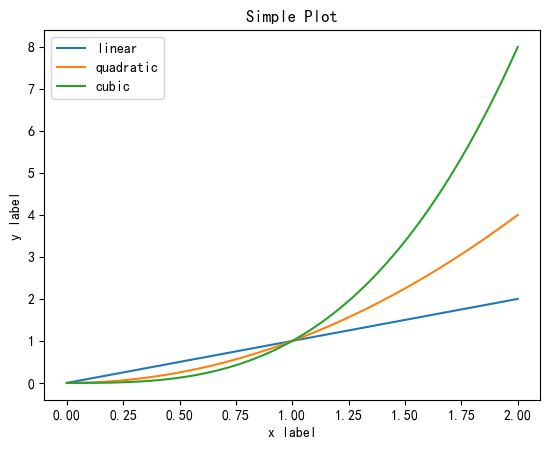

In [8]:
x = np.linspace(0, 2, 100)
# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ax = plt.subplots()                # Create a figure and an axes.
ax.plot(x, x, label='linear')           # Plot some data on the axes.
ax.plot(x, x**2, label='quadratic')     # Plot more data on the axes...
ax.plot(x, x**3, label='cubic')         # ... and some more.
ax.set_xlabel('x label')                # Add an x-label to the axes.
ax.set_ylabel('y label')                # Add a y-label to the axes.
ax.set_title("Simple Plot")             # Add a title to the axes.
ax.legend()                             # Add a legend.

#### <a id='toc1_1_1_2_'></a>[基于pyplot接口](#toc0_)

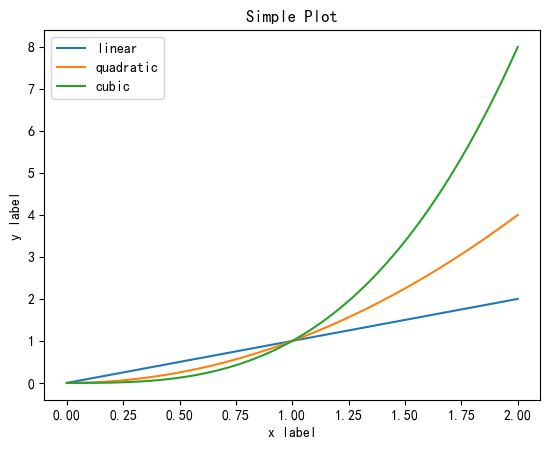

In [9]:
x = np.linspace(0, 2, 100)
plt.plot(x, x, label='linear')          # Plot some data on the (implicit) axes.
plt.plot(x, x**2, label='quadratic')    # etc.
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend()

#### <a id='toc1_1_1_3_'></a>[基于GUI](#toc0_)

# <a id='toc2_'></a>[Figure和Axes整体布局](#toc0_)

## <a id='toc2_1_'></a>[方式一（推荐）](#toc0_)

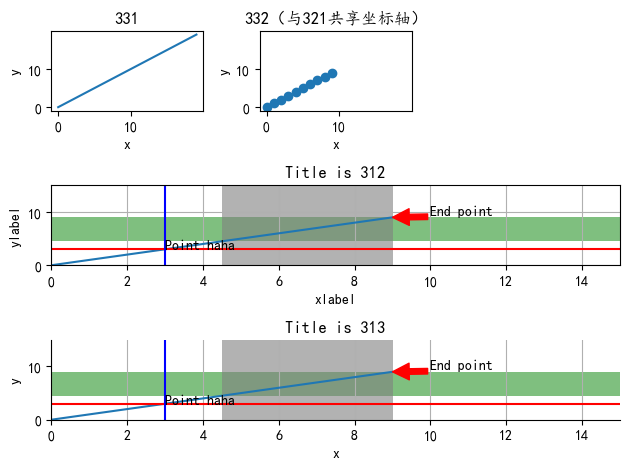

In [10]:

# pyplot方式进行绘图（其实是pyplot和面向对象混用）
plt.figure()                                    # 创建一个figure画布

ax1 = plt.subplot(331)                          # 创建一个axes，因为subplot返回值就是axes类型，其实也是通过add_subplot()实现的（原函数）
                                                # ax1也可以不用指出，此处为了方便后续共享坐标轴
                                                # row = 3, col = 3, index = 1
                                                # 共享坐标轴：sharex=ax1, sharey=ax1,这是非常有用的
plt.plot(range(0,20))
plt.xlabel("x")
plt.ylabel("y")
plt.title('331')

plt.subplot(332,sharex=ax1,sharey=ax1)          # 创建一个axes，并指明与ax1共享坐标轴
plt.scatter(range(0, 10),range(0,10))
plt.xlabel("x")
plt.ylabel("y")
plt.title("332（与321共享坐标轴）")

plt.subplot(312)                                # 创建一个axes，不用共享坐标轴
plt.plot(range(0, 10))
plt.xlim([0, 15])                                                                       # xlim,plt.xlim(xmin,xmax)
plt.ylim([0, 15])                                                                       # ylim
plt.grid()                                                                              # grid
plt.axhline(y=3, c='r')                                                                 # hor:水平线
plt.axvline(x=3, c='Blue')                                                              # ver:垂直线
plt.axhspan(ymin=4.5, ymax=9.0, facecolor='green', alpha=0.5)                           # 水平区间
plt.axvspan(xmin=4.5, xmax=9.0, facecolor='gray', alpha=0.6)                            # 垂直区间
plt.annotate(text='End point',xy=(9,9),xytext=(10,9.5),arrowprops={'color':'r'})        # 注释文本
plt.text(x=3,y=3,s='Point haha')                                                        # 简单的文本说明，注释文本
plt.xlabel("xlabel")
plt.ylabel("ylabel")
plt.title("Title is 312")

ax4 = plt.subplot(313)                          # 创建一个axes，不用共享坐标轴，混合面向对象编程
ax4.plot(range(0, 10))
ax4.set_xlim([0,15])
ax4.set_ylim([0,15])
ax4.grid(True,axis='x')
ax4.axhline(y=3, c='r')
ax4.axvline(x=3, c='Blue')
ax4.axhspan(ymin=4.5, ymax=9.0, facecolor='green', alpha=0.5)
ax4.axvspan(xmin=4.5, xmax=9.0, facecolor='gray', alpha=0.6)
ax4.annotate(text='End point',xy=(9,9),xytext=(10,9.5),arrowprops={'color':'r'})
ax4.text(x=3,y=3,s='Point haha')
ax4.set_xlabel('x')
ax4.set_ylabel('y')
ax4.set_title('Title is 313')
ax4.spines['right'].set_color('None')                                                   # 取消right
ax4.spines['top'].set_color('None')                                                     # 取消top

# plt.subplots_adjust(left=0.5,right=1,bottom=0.5,top=1,wspace=1,hspace=2)              # 调整figure边距和子图的间距
plt.tight_layout()                                                                      # 自动针对figure对象操作的

## <a id='toc2_2_'></a>[方式二](#toc0_)

Text(0.5, 1.0, 'ax1')

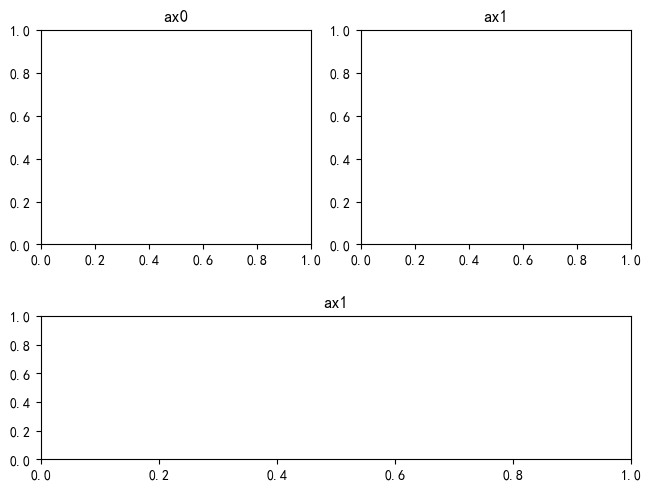

In [11]:
# 面向对象的方式操作子图
fig = plt.figure(constrained_layout= True)  # 先画一个figure
ax0 = fig.add_subplot(221)                  # add_subplot()返回一个ax
                                            # 共享坐标轴：sharex=ax1, sharey=ax1
ax0.set_title('ax0')
ax1 = fig.add_subplot(222)
ax1.set_title('ax1')
ax2 = fig.add_subplot(313)
ax2.set_title('ax1')

## <a id='toc2_3_'></a>[方式三](#toc0_)

Text(0.5, 1.0, 'ax3')

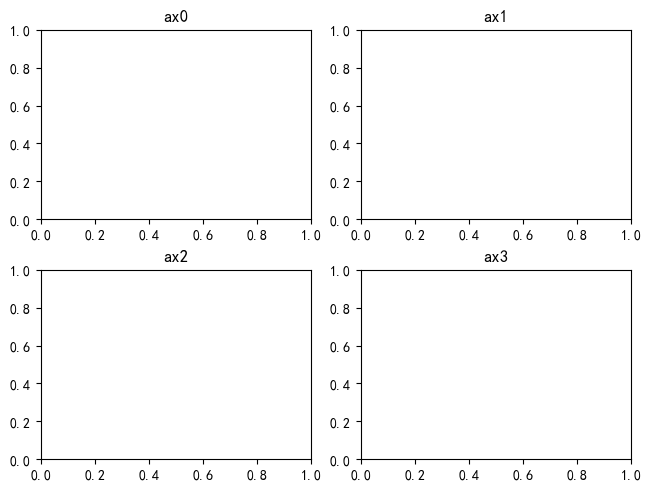

In [12]:
# 面向对象方式，一开始就设计好布局
fig, ([ax0, ax1],[ax2, ax3]) = plt.subplots(ncols= 2, nrows= 2, constrained_layout=True) # 先画一个figure，同时设计好所有ax，subplots()一次返回全部ax
                                                                                         # subplots(sharex, sharey) # 绘制共享坐标轴图形时候非常有用
ax0.set_title('ax0')
ax1.set_title('ax1')
ax2.set_title('ax2')
ax3.set_title('ax3')

# <a id='toc3_'></a>[Axes中的图形](#toc0_)

## <a id='toc3_1_'></a>[柱状图](#toc0_)

### <a id='toc3_1_1_'></a>[垂直柱状图](#toc0_)
[bar()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html#matplotlib.pyplot.bar)

In [13]:
matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)
# =============================================================================
# x, 柱子位置
# height, 柱子高度
# width, 柱子宽度,bar()时，默认0.8
# bottom, 柱子y值的起点，默认为0
# align, 柱子与x轴对齐方式
# color, 柱子颜色
# edgecolor, 柱子边缘颜色
# linewidth, 柱子边缘线宽
# tick_label, 柱子标签
# xerr, 误差
# yerr, 误差
# ecolor, 误差线颜色
# capsize, 误差SD大小
# log, 默认False，y轴取log值
# =============================================================================

SyntaxError: iterable argument unpacking follows keyword argument unpacking (3803053400.py, line 1)

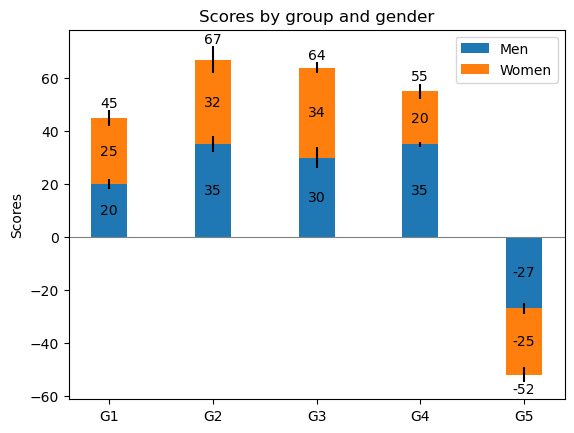

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

N = 5
menMeans = (20, 35, 30, 35, -27)
womenMeans = (25, 32, 34, 20, -25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)      # the x locations for the groups
width = 0.35            # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

p1 = ax.bar(ind, menMeans, width, yerr=menStd, label='Men')
p2 = ax.bar(ind, womenMeans, width,
            bottom=menMeans, yerr=womenStd, label='Women')

ax.axhline(0, color='grey', linewidth=0.8)
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind)
ax.set_xticklabels(('G1', 'G2', 'G3', 'G4', 'G5'))
ax.legend()

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(p1, label_type='center')   # 在柱子上添加标签
ax.bar_label(p2, label_type='center')
ax.bar_label(p2)

plt.show()

### <a id='toc3_1_2_'></a>[水平柱状图](#toc0_)

[barh()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.barh.html?highlight=barh#matplotlib.pyplot.barh)


In [ ]:
matplotlib.pyplot.barh(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)
# =============================================================================
# x, 柱子位置
# height, 柱子高度，barh()时，默认0.8
# width, 柱子宽度
# bottom, 柱子y值的起点，默认为0
# align, 柱子与x轴对齐方式
# color, 柱子颜色
# edgecolor, 柱子边缘颜色
# linewidth, 柱子边缘线宽
# tick_label, 柱子标签
# xerr, 误差
# yerr, 误差
# ecolor, 误差线颜色
# capsize, 误差SD大小
# log, 默认False，y轴取log值
# =============================================================================

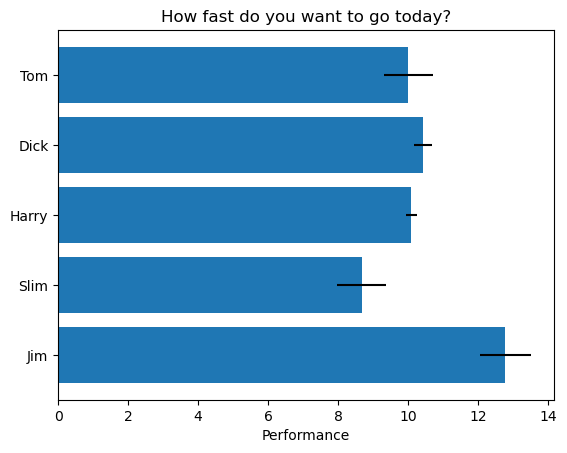

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.barh(y_pos, performance, xerr=error, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom，反向排序
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

plt.show()

### <a id='toc3_1_3_'></a>[跳跃柱状图](#toc0_)

[broken_barh()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.broken_barh.html?highlight=broken_barh#matplotlib.pyplot.broken_barh)

In [ ]:
matplotlib.pyplot.broken_barh(xranges, yrange, *, data=None, **kwargs)

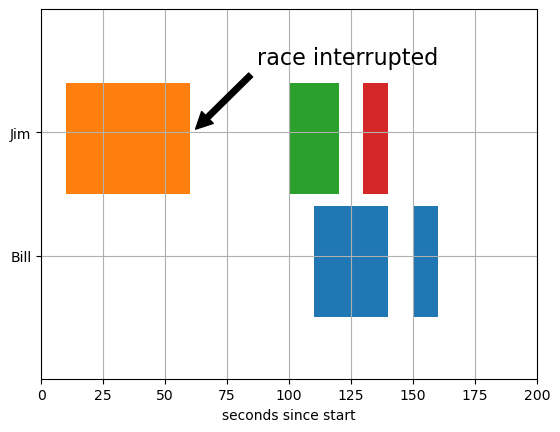

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.broken_barh([(110, 30), (150, 10)], (10, 9), facecolors='tab:blue')
ax.broken_barh([(10, 50), (100, 20), (130, 10)], (20, 9),
               facecolors=('tab:orange', 'tab:green', 'tab:red'))
ax.set_ylim(5, 35)
ax.set_xlim(0, 200)
ax.set_xlabel('seconds since start')
ax.set_yticks([15, 25])
ax.set_yticklabels(['Bill', 'Jim'])
ax.grid(True) # 添加网格
ax.annotate('race interrupted', (61, 25),
            xytext=(0.8, 0.9), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            fontsize=16,
            horizontalalignment='right', verticalalignment='top')
plt.show()

## <a id='toc3_2_'></a>[散点图](#toc0_)

[scatter()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html#matplotlib.pyplot.scatter)


In [ ]:
matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs)
# =============================================================================
# x, x值
# y, y值
# s, size即每个scatter的大小
# c, color及scatter的颜色
# marker, 默认:rcParams['scatter.marker'](为'o')即scatter形状
# cmap, 默认:rcParams['image.cmap'](default:'viridis')
# norm, default:None即标准化为0到1之间数值
# alpha, default:None即透明度
# linewidth, default:rcParams['lines.linewidth'](default:1.5)即线宽度
# edgecolors:{'face', 'none', None} default:rcParams['scatter.edgecolors'](default:'face')即边线颜色
# =============================================================================

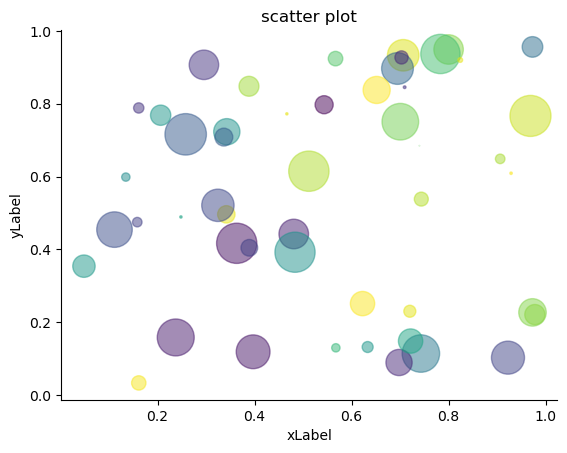

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Tue Jul 13 14:06:16 2021

@author: Bio-windows
"""
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

if __name__ == '__main__':
    '''main function'''
    np.random.seed(19680801)

    N = 50
    x = np.random.rand(N)
    y = np.random.rand(N)
    colors = np.random.rand(N)
    area = (30 * np.random.rand(N))**2
        
    fig, ax = plt.subplots()
    
    ax.scatter(x, y, s=area, c=colors, alpha= 0.5)
    
    ax.set_title('scatter plot')
    ax.set_xlabel('xLabel')
    ax.set_ylabel('yLabel')
    ax.spines[['top', 'right']].set_visible(False)

## <a id='toc3_3_'></a>[线性图](#toc0_)

[plot()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot)


In [ ]:
matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)
# =============================================================================
# x,
# y,
# color,
# marker, . , o, ^ < > 1 2 3 4 8 s p P * h H + x X D d | _
# markersize,
# markerfacecolor,
# markeredgecolor, 
# linestyle, - -- -. : 线样式
# linewidth, 线宽度
# linecolor, 线颜色
# alpha, 透明度
# label, 这组数据的标签
# =============================================================================

NameError: name 'matplotlib' is not defined

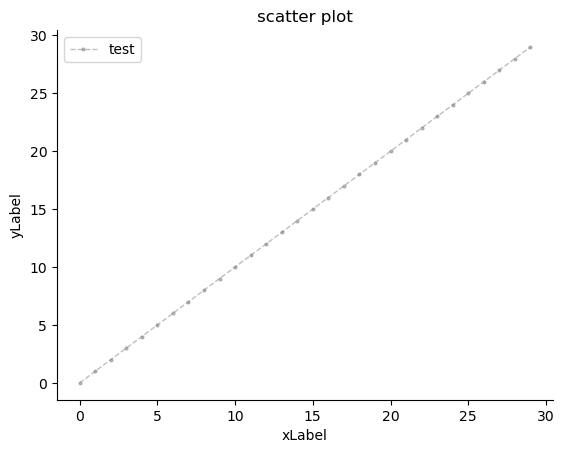

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Tue Jul 13 14:06:16 2021

@author: Bio-windows
"""
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

if __name__ == '__main__':
    '''main function'''
    x = range(30)
    y = range(30)
        
    fig, ax = plt.subplots()
    
    # ax.scatter(x, y, s=area, c=colors, alpha= 0.5)
    # ax.step(x, y)
    ax.plot(x, y, color='grey', marker='o', markersize=2, linestyle='dashed', linewidth=1, alpha=0.5, label='test')
    ax.legend()
    
    ax.set_title('scatter plot')
    ax.set_xlabel('xLabel')
    ax.set_ylabel('yLabel')
    ax.spines[['top', 'right']].set_visible(False)

## <a id='toc3_4_'></a>[阶梯图](#toc0_)

[step()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.step.html#matplotlib.pyplot.step)


In [ ]:
matplotlib.pyplot.step(x, y, *args, where='pre', data=None, **kwargs)

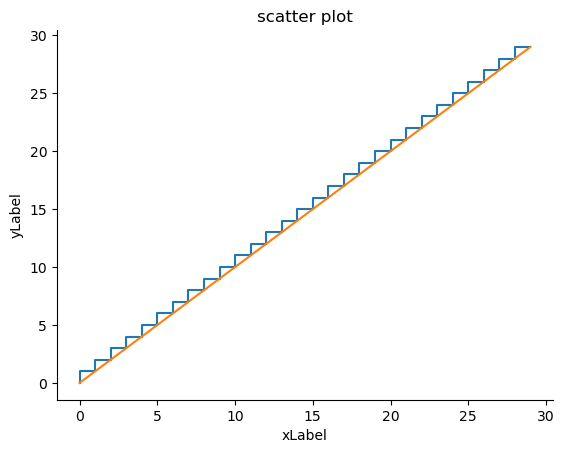

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Tue Jul 13 14:06:16 2021

@author: Bio-windows
"""
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

if __name__ == '__main__':
    '''main function'''
    x = range(30)
    y = range(30)
        
    fig, ax = plt.subplots()
    
    # ax.scatter(x, y, s=area, c=colors, alpha= 0.5)
    ax.step(x, y)
    ax.plot(x, y)
    
    ax.set_title('scatter plot')
    ax.set_xlabel('xLabel')
    ax.set_ylabel('yLabel')
    ax.spines[['top', 'right']].set_visible(False)

## <a id='toc3_5_'></a>[频率分布直方图](#toc0_)

[hist()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist)


In [ ]:
matplotlib.pyplot.hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)
# =============================================================================
# x, 
# bins, default:rcParams['hist.bins'](default:0)即间隔的个数
# range, tuple or None, default:None，(x.min(), x.max())
# density:bool,default:False,若True则画出概率密度曲线
# weight, 权重
# cumulative:bool or -1,default:False,累计
# bottom, 每个bin的起始位置
# histtype:{'bar', 'barstacked', 'step', 'stepfilled'},default:'bar'
# align:{'left', 'mid', 'right'},default:'mid'
# orientation:{'vertical', 'horizontal'}, default:'vertical'
# rwidth:flaot or None,default:None
# log:bool,default:False
# color, defautl:None
# label, 数据标签
# stacked:bool, default:False
# =============================================================================
# returns:
# 		n
#		bins:array
#		patch:properties

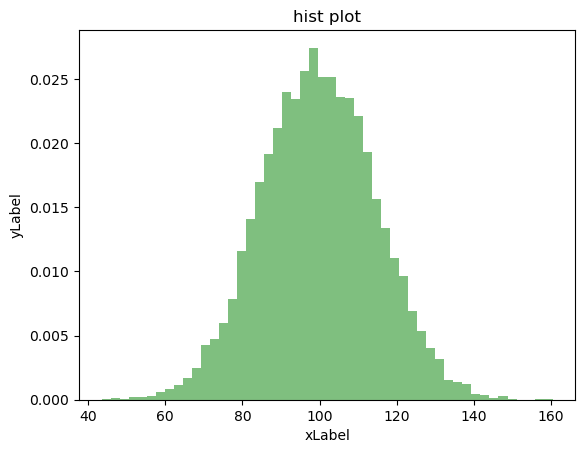

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Tue Jul 13 19:55:02 2021

@author: Bio-windows
"""
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

if __name__ == '__main__':
    '''main function'''
    
    np.random.seed(19680801)
    mu, sigma = 100, 15
    x = mu + sigma * np.random.randn(10000)
    
    fig, ax =plt.subplots()
    
    ax.hist(x, 50, density=True, facecolor='green', alpha=0.5)
    
    ax.set_title('hist plot')
    ax.set_xlabel('xLabel')
    ax.set_ylabel('yLabel')

## <a id='toc3_6_'></a>[表格直方图](#toc0_)

[tables()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.table.html#matplotlib.pyplot.table)


In [ ]:
matplotlib.pyplot.table(cellText=None, cellColours=None, cellLoc='right', colWidths=None, rowLabels=None, rowColours=None, rowLoc='left', colLabels=None, colColours=None, colLoc='center', loc='bottom', bbox=None, edges='closed', **kwargs)
# =============================================================================
# cellText：2D list of str, optional
# The texts to place into the table cells.
# 
# Note: Line breaks in the strings are currently not accounted for and will result in the text exceeding the cell boundaries.
# 
# cellColours：2D list of colors, optional
# The background colors of the cells.
# 
# cellLoc：{'left', 'center', 'right'}, default: 'right'
# The alignment of the text within the cells.
# 
# colWidth：slist of float, optional
# The column widths in units of the axes. If not given, all columns will have a width of 1 / ncols.
# 
# rowLabelslist of str, optional
# The text of the row header cells.
# 
# rowColourslist of colors, optional
# The colors of the row header cells.
# 
# rowLoc{'left', 'center', 'right'}, default: 'left'
# The text alignment of the row header cells.
# 
# colLabels：list of str, optional
# The text of the column header cells.
# 
# colColours：list of colors, optional
# The colors of the column header cells.
# 
# colLoc：{'left', 'center', 'right'}, default: 'left'
# The text alignment of the column header cells.
# 
# loc：str, optional
# The position of the cell with respect to ax. This must be one of the codes.
# 
# bbox：Bbox, optional
# A bounding box to draw the table into. If this is not None, this overrides loc.
# 
# edges：substring of 'BRTL' or {'open', 'closed', 'horizontal', 'vertical'}
# The cell edges to be drawn with a line. See also visible_edges.
# =============================================================================

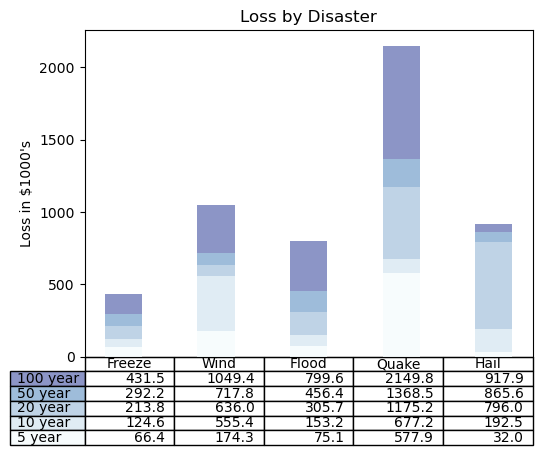

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = [[ 66386, 174296,  75131, 577908,  32015],
        [ 58230, 381139,  78045,  99308, 160454],
        [ 89135,  80552, 152558, 497981, 603535],
        [ 78415,  81858, 150656, 193263,  69638],
        [139361, 331509, 343164, 781380,  52269]]
columns = ('Freeze', 'Wind', 'Flood', 'Quake', 'Hail')
rows = ['%d year' % x for x in (100, 50, 20, 10, 5)]

values = np.arange(0, 2500, 500)
value_increment = 1000

# Get some pastel shades for the colors
colors = plt.cm.BuPu(np.linspace(0, 0.5, len(rows)))
n_rows = len(data)

index = np.arange(len(columns)) + 0.3
bar_width = 0.4

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data[row]
    cell_text.append(['%1.1f' % (x / 1000.0) for x in y_offset])
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
cell_text.reverse()

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.ylabel("Loss in ${0}'s".format(value_increment))
plt.yticks(values * value_increment, ['%d' % val for val in values])
plt.xticks([])
plt.title('Loss by Disaster')

plt.show()

## <a id='toc3_7_'></a>[饼图](#toc0_)

[pie()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html#matplotlib.pyplot.pie)


In [ ]:
matplotlib.pyplot.pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=0, radius=1, counterclock=True, wedgeprops=None, textprops=None, center=0, 0, frame=False, rotatelabels=False, *, normalize=None, data=None)
# =============================================================================
# x:1D array-like
# explode:array-like,default:None 突出显示某个部分
# label
# colors
# autopct 自动计算所占比例并在图中显示出来
# pctdistance:float,default:0.6
# shadow:bool,default:False 阴影特效
# normalize:None,default:False
# labeldistance:float or None,default:1.1
# startangle:float,default:0 degrees 
# radius:float,default:1
# counterclock:bool,default:True
# wedgeprops:dic,default:None
# textprops:dic,default:None
# center:(float,float),default:(0,0)
# frame:bool,default:False
# rotatelabels:bool,default:False
# =============================================================================

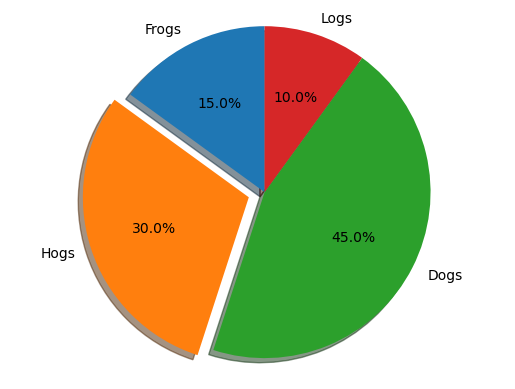

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)        # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')               # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## <a id='toc3_8_'></a>[轮廓和伪彩色](#toc0_)

[pcolormesh()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pcolormesh.html#matplotlib.pyplot.pcolormesh)


In [ ]:
matplotlib.pyplot.pcolormesh(*args, alpha=None, norm=None, cmap=None, vmin=None, vmax=None, shading=None, antialiased=False, data=None, **kwargs)
# =============================================================================
# x, 柱子位置
# =============================================================================

[contour()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html#matplotlib.pyplot.contour)


In [ ]:
matplotlib.pyplot.contour(*args, data=None, **kwargs)
# =============================================================================
# x, 柱子位置
# =============================================================================

[ploar()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.polar.html#matplotlib.pyplot.polar)


In [ ]:
matplotlib.pyplot.polar(*args, **kwargs)
# =============================================================================
# x, 柱子位置
# =============================================================================

## <a id='toc3_9_'></a>[时间序列](#toc0_)

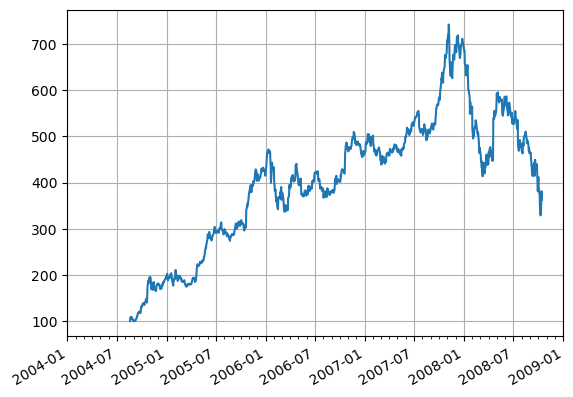

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
# Load a numpy structured array from yahoo csv data with fields date, open,
# close, volume, adj_close from the mpl-data/example directory.  This array
# stores the date as an np.datetime64 with a day unit ('D') in the 'date'
# column.
data = cbook.get_sample_data('goog.npz', np_load=True)['price_data']

fig, ax = plt.subplots()
ax.plot('date', 'adj_close', data=data)

# Major ticks every 6 months.
fmt_half_year = mdates.MonthLocator(interval=6)
ax.xaxis.set_major_locator(fmt_half_year)

# Minor ticks every month.
fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)

# Text in the x axis will be displayed in 'YYYY-mm' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Round to nearest years.
datemin = np.datetime64(data['date'][0], 'Y')
datemax = np.datetime64(data['date'][-1], 'Y') + np.timedelta64(1, 'Y')
ax.set_xlim(datemin, datemax)

# Format the coords message box, i.e. the numbers displayed as the cursor moves
# across the axes within the interactive GUI.
ax.format_xdata = mdates.DateFormatter('%Y-%m')
ax.format_ydata = lambda x: f'${x:.2f}'  # Format the price.
ax.grid(True)

# Rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them.
fig.autofmt_xdate()

plt.show()

## <a id='toc3_10_'></a>[3D](#toc0_)

[3D ploting](https://matplotlib.org/stable/gallery/index.html#mplot3d-examples-index)


In [ ]:
# =============================================================================
# x, 柱子位置
# =============================================================================

## <a id='toc3_11_'></a>[图例](#toc0_)

[legend()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html#matplotlib.pyplot.legend)


In [ ]:
matplotlib.pyplot.legend(*args, **kwargs)
# =============================================================================
# x, 柱子位置
# =============================================================================

# <a id='toc4_'></a>[Axes中的注释（annotate）](#toc0_)

[annotate()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html?highlight=annotate#matplotlib.pyplot.annotate)


In [ ]:
matplotlib.pyplot.annotate(text, xy, *args, **kwargs)
# =============================================================================
# x, 柱子位置
# =============================================================================

NameError: name 'matplotlib' is not defined


# <a id='toc5_'></a>[Axes中的网格（grid）](#toc0_)

In [ ]:
matplotlib.pyplot.grid(b=None, which='major', axis='both', **kwargs)
# =============================================================================
# x, 柱子位置
# =============================================================================

# <a id='toc6_'></a>[Axes中的边线（spines）](#toc0_)

In [ ]:
# =============================================================================
# x, 柱子位置
# =============================================================================

# <a id='toc7_'></a>[配置](#toc0_)
## <a id='toc7_1_'></a>[修改参数](#toc0_)
### <a id='toc7_1_1_'></a>[修改matplotlib配置-代码层面](#toc0_)
- 属性字典：
  - matplotlib.rcParms
  - matplotlib.pyplot.rcParams
- 属性函数：
  - matplotlib.rc()
  - matplotlib.pyplot.rc()
- 恢复默认参数：
  - matplotlib.rcdefaults()
  - matplotlib.pyplot.rcdefaults()
### <a id='toc7_1_2_'></a>[修改matplotlib配置-配置文件层面](#toc0_)
- 文件位置：
  - Windows 平台上， matplotlibrc 文件在$HOME .matplotlib
  - Linux 平台上，如果$HO:~ .matplotlib 路径存在，那么就在$HOME .matplotlib 中；如果$XDG CONFIG HOME 被定义，那么就在$XDG_ CONFIG HOME 里；或者在$HOME .config
可以用 matplotlib.get_conf1gdir（）函数来找到配置文件默认目录
  - )maψlotlib 的安装路径： maψlotlibrc 文件在路径 INSTALL/m lotlib mpl-data/maφlotlibrc 中，其中， INSTALL 类似于Linux 平台上的 usr python3. site-packages Windows 平台上的 ,(" C:\Python35\Lib site-packages

## <a id='toc7_2_'></a>[修改全局字体](#toc0_)
- 查看所有字体：
  - 运行后他会显示出所有支持的字体，大约100多种。。。。具体的我就不一一列举了
  - 中文字体在哪里？ 其实他是有中文的只不过是用拼音写的....
    - DengXian
    - FangSong
    - KaiTi
    - LiSu
    - YouYuan
    - Adobe Fan Heiti Std
    - Adobe Fangsong Std
    - Adobe Heiti Std
    - Adobe Kaiti Std

In [14]:
# 查询当前系统所有字体
from matplotlib.font_manager import FontManager
mpl_fonts = set(f.name for f in FontManager().ttflist)
print('all font list get from matplotlib.font_manager:')
for f in sorted(mpl_fonts):
    print('\t' + f)

all font list get from matplotlib.font_manager:
	Adobe Arabic
	Adobe Caslon Pro
	Adobe Devanagari
	Adobe Fan Heiti Std
	Adobe Fangsong Std
	Adobe Garamond Pro
	Adobe Gothic Std
	Adobe Hebrew
	Adobe Heiti Std
	Adobe Kaiti Std
	Adobe Ming Std
	Adobe Myungjo Std
	Adobe Naskh
	Adobe Song Std
	Arial
	Bahnschrift
	Birch Std
	Blackoak Std
	Book Antiqua
	Bookman Old Style
	Bookshelf Symbol 7
	Bradley Hand ITC
	Brush Script Std
	CAJNote
	Calibri
	Cambria
	Candara
	Century
	Century Gothic
	Chaparral Pro
	Charlemagne Std
	Comic Sans MS
	Consolas
	Constantia
	Cooper Std
	Corbel
	Courier New
	DejaVu Sans
	DejaVu Sans Display
	DejaVu Sans Mono
	DejaVu Serif
	DejaVu Serif Display
	DengXian
	Dubai
	Ebrima
	FZShuTi
	FZYaoTi
	FangSong
	Font Awesome 5 Brands
	Font Awesome 5 Free Regular
	Font Awesome 5 Free Solid
	FontAwesome
	Franklin Gothic Medium
	Freestyle Script
	French Script MT
	Gabriola
	Gadugi
	Garamond
	Georgia
	Giddyup Std
	HGBS_CNKI
	HGBTH_CNKI
	HGBTS_CNKI
	HGCH_CNKI
	HGCUH_CNKI
	HGCY_CNKI
	H

- 显示出中文

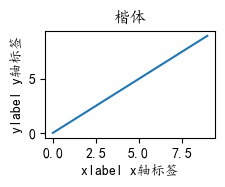

In [39]:
import matplotlib.pyplot as plt

# plt.figure()
# # plt.rcdefaults()                    # 重置成默认的参数
# plt.subplot(331)
# plt.plot(range(0,10))
# plt.xlabel('xlabel x轴标签')
# plt.ylabel('ylabel y轴标签')
# plt.title('系统默认')

# plt.subplot(332)
# plt.rc('font',family='YouYuan')     # YouYuan字体
# plt.plot(range(0,10))
# plt.xlabel('xlabel x轴标签')
# plt.ylabel('ylabel y轴标签')
# plt.title('YouYuan')

plt.subplot(333)
plt.rc('font',family='KaiTi')       # 楷体
plt.plot(range(0,10))
plt.xlabel('xlabel x轴标签')
plt.ylabel('ylabel y轴标签')
plt.title('楷体')

plt.tight_layout()

- 写论文时候：
  - 字体：Times new roman
  - pdf：pdf.fonttype = 42

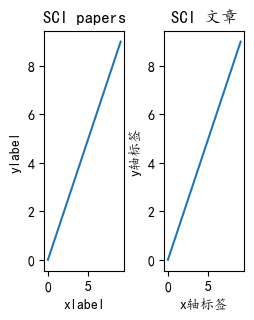

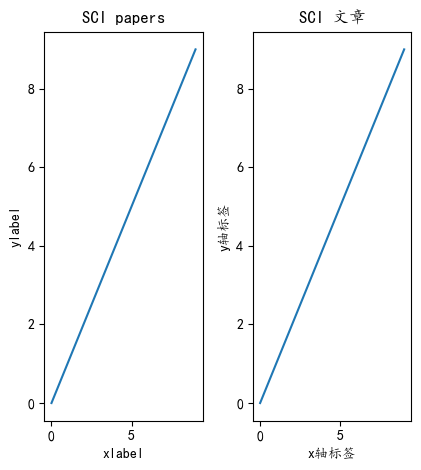

In [1]:
import matplotlib.pyplot as plt

# plt.rc('font', family='Times new roman')                          # Arial
# 最好统一使用属性字典来配置：
plt.rcParams['font.sans-serif'] = ['KaiTi', 'Times new roman']      # 优先使用楷体，后匹配新罗马字体
plt.rcParams['axes.unicode_minus'] = False                          # 显示正负号
plt.rcParams['pdf.fonttype'] = 42                                   # ai可编辑的字体格式

plt.figure()
plt.subplot(131)
plt.plot(range(0,10))
plt.xlabel('xlabel')
plt.ylabel('ylabel')
plt.title('SCI papers')

plt.subplot(132)
plt.plot(range(0,10))
plt.xlabel('x轴标签')
plt.ylabel('y轴标签')
plt.title('SCI 文章')

plt.subplots_adjust(left=0.5,right=1,bottom=0.5,top=1,wspace=0.5)
# plt.tight_layout()

# 比较subplots_adjust和tight_layout效果
plt.figure()
plt.subplot(131)
plt.plot(range(0,10))
plt.xlabel('xlabel')
plt.ylabel('ylabel')
plt.title('SCI papers')

plt.subplot(132)
plt.plot(range(0,10))
plt.xlabel('x轴标签')
plt.ylabel('y轴标签')
plt.title('SCI 文章')

# plt.subplots_adjust(left=0.5,right=1,bottom=0.5,top=1,wspace=0.5)
plt.tight_layout()

In [3]:
import matplotlib.pyplot as plt
# dir(plt.rcParams)
help(plt.rcParams)

Help on RcParams in module matplotlib object:

class RcParams(collections.abc.MutableMapping, builtins.dict)
 |  RcParams(*args, **kwargs)
 |  
 |  A dictionary object including validation.
 |  
 |  Validating functions are defined and associated with rc parameters in
 |  :mod:`matplotlib.rcsetup`.
 |  
 |  The list of rcParams is:
 |  
 |  - _internal.classic_mode
 |  - agg.path.chunksize
 |  - animation.bitrate
 |  - animation.codec
 |  - animation.convert_args
 |  - animation.convert_path
 |  - animation.embed_limit
 |  - animation.ffmpeg_args
 |  - animation.ffmpeg_path
 |  - animation.frame_format
 |  - animation.html
 |  - animation.writer
 |  - axes.autolimit_mode
 |  - axes.axisbelow
 |  - axes.edgecolor
 |  - axes.facecolor
 |  - axes.formatter.limits
 |  - axes.formatter.min_exponent
 |  - axes.formatter.offset_threshold
 |  - axes.formatter.use_locale
 |  - axes.formatter.use_mathtext
 |  - axes.formatter.useoffset
 |  - axes.grid
 |  - axes.grid.axis
 |  - axes.grid.which
 

## <a id='toc7_3_'></a>[全局风格（style）](#toc0_)

In [5]:
import matplotlib.pyplot as plt

plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [39]:
# plt.style.use('seaborn-whitegrid')                # 这样做会改变后续所有style
# with plt.style.content('seaborn-whitegrid')       # 上下文管理器

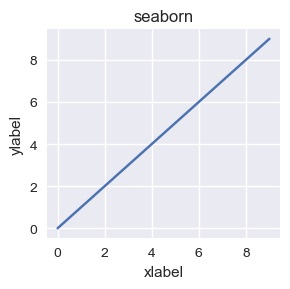

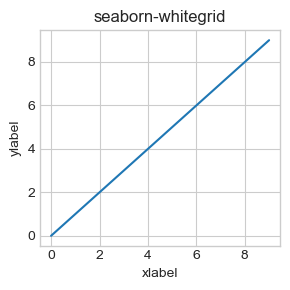

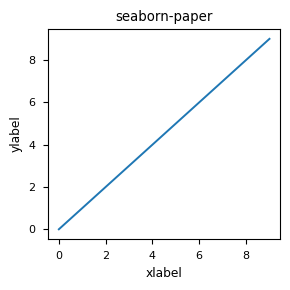

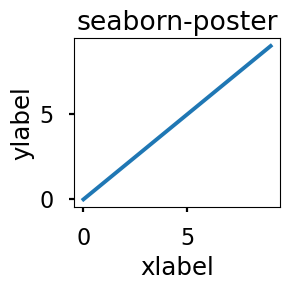

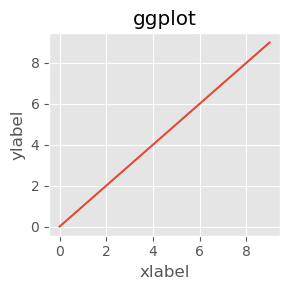

In [46]:
import matplotlib.pyplot as plt

styles = plt.style.available            # 查看所有的style
styles = ['seaborn',
          'seaborn-whitegrid',
          'seaborn-paper',
          'seaborn-poster',
          'ggplot']
for styleRec in styles:
    with plt.style.context(styleRec):
        plt.figure(figsize=(3,3))
        plt.plot(range(0,10))
        plt.xlabel('xlabel')
        plt.ylabel('ylabel')
        plt.title(styleRec)
        plt.tight_layout()
        plt.show()